In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir= r"C:\Users\Bardia\data\cats_and_dogs_small\train"
valid_dir= r"C:\Users\Bardia\data\cats_and_dogs_small\validation"
test_dir= r"C:\Users\Bardia\data\cats_and_dogs_small\test"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
            train_dir,
            target_size=(150,150),
            batch_size=20,
            class_mode='binary')
                  
valid_generator=test_datagen.flow_from_directory(
            valid_dir,
            target_size=(150,150),
            batch_size=20,
            class_mode='binary')                    


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras  import models

In [8]:
model=models.Sequential()
#filter = 32 , window size convolution = 3,3  , window size pooling = 2,2
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
#after pooling image (150,150) convert (75,75)
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
#after pooling image (150,150) convert (33,33) and .....
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
# the number of filter is increse(*2) and the number of pooling(decrease img) cause image is higher performance
# after 4 layer conv, and 4 pooling , we need flatten and dense (1 neurn output)
# hidden layer use relu activation and output layer use sigmoid
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [23]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [24]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=20,validation_data=valid_generator,validation_steps=50)

Epoch 1/20
100/100 [==============================] - 135s 1s/step - loss: 0.6855 - acc: 0.5465 - val_loss: 0.6584 - val_acc: 0.6030
Epoch 2/20
100/100 [==============================] - 125s 1s/step - loss: 0.6548 - acc: 0.6065 - val_loss: 0.6409 - val_acc: 0.6350
Epoch 3/20
100/100 [==============================] - 126s 1s/step - loss: 0.6051 - acc: 0.6760 - val_loss: 0.6115 - val_acc: 0.6530
Epoch 4/20
100/100 [==============================] - 126s 1s/step - loss: 0.5683 - acc: 0.6940 - val_loss: 0.6100 - val_acc: 0.6620
Epoch 5/20
100/100 [==============================] - 125s 1s/step - loss: 0.5337 - acc: 0.7245 - val_loss: 0.6098 - val_acc: 0.6630
Epoch 6/20
100/100 [==============================] - 125s 1s/step - loss: 0.5069 - acc: 0.7495 - val_loss: 0.5713 - val_acc: 0.7000
Epoch 7/20
100/100 [==============================] - 125s 1s/step - loss: 0.4840 - acc: 0.7545 - val_loss: 0.5749 - val_acc: 0.6870
Epoch 8/20
100/100 [==============================] - 126s 1s/step - 

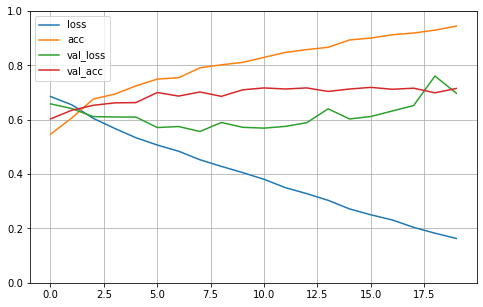

In [25]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()